### Multiple Regression Assignment - Boom Bike Sharing
The concept of bike-sharing is a service in which bicycles are made available for individuals to use on a temporary basis for a fee or for free. People can borrow bikes from docks that are typically computer controlled where they enter payment information and the system unlocks the bike. After lending the bike, the bike can be returned to another dock attached to the same system.

#### Business Goal
Using the available independent variables, model the demand for shared bikes. To understand how different features affect the demands, the management will use this. As a result, they are able to adjust their business strategies to meet demand levels and meet the customer's expectations. Moreover, it will be useful for management to understand how a new market's demand will evolve.

### Step 1: Reading and Understanding Data 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings ('ignore')

In [2]:
bbikes = pd.read_csv("day.csv")
bbikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Data Quality Checks

In [3]:
bbikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no Missing Values 

In [4]:
bbikes.shape


(730, 16)

In [5]:
bbikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#Mapping variables season, month, weathersit, weekday

bbikes['season']=bbikes.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bbikes['mnth']=bbikes.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bbikes['weathersit']=bbikes.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bbikes['weekday']=bbikes.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bbikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Step 2: Data Visualisation


#### Identifing Categorical and Continues features 

In [7]:
#Checking Unique values - 
#If unique values in a column is <=40: Categorical Column
#If unique values in a columns is > 50: Continuous Column

bbikes.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

##### Categorical Columns - 7 , Continuos Columns - 9 


## Numerical variable visualisation 

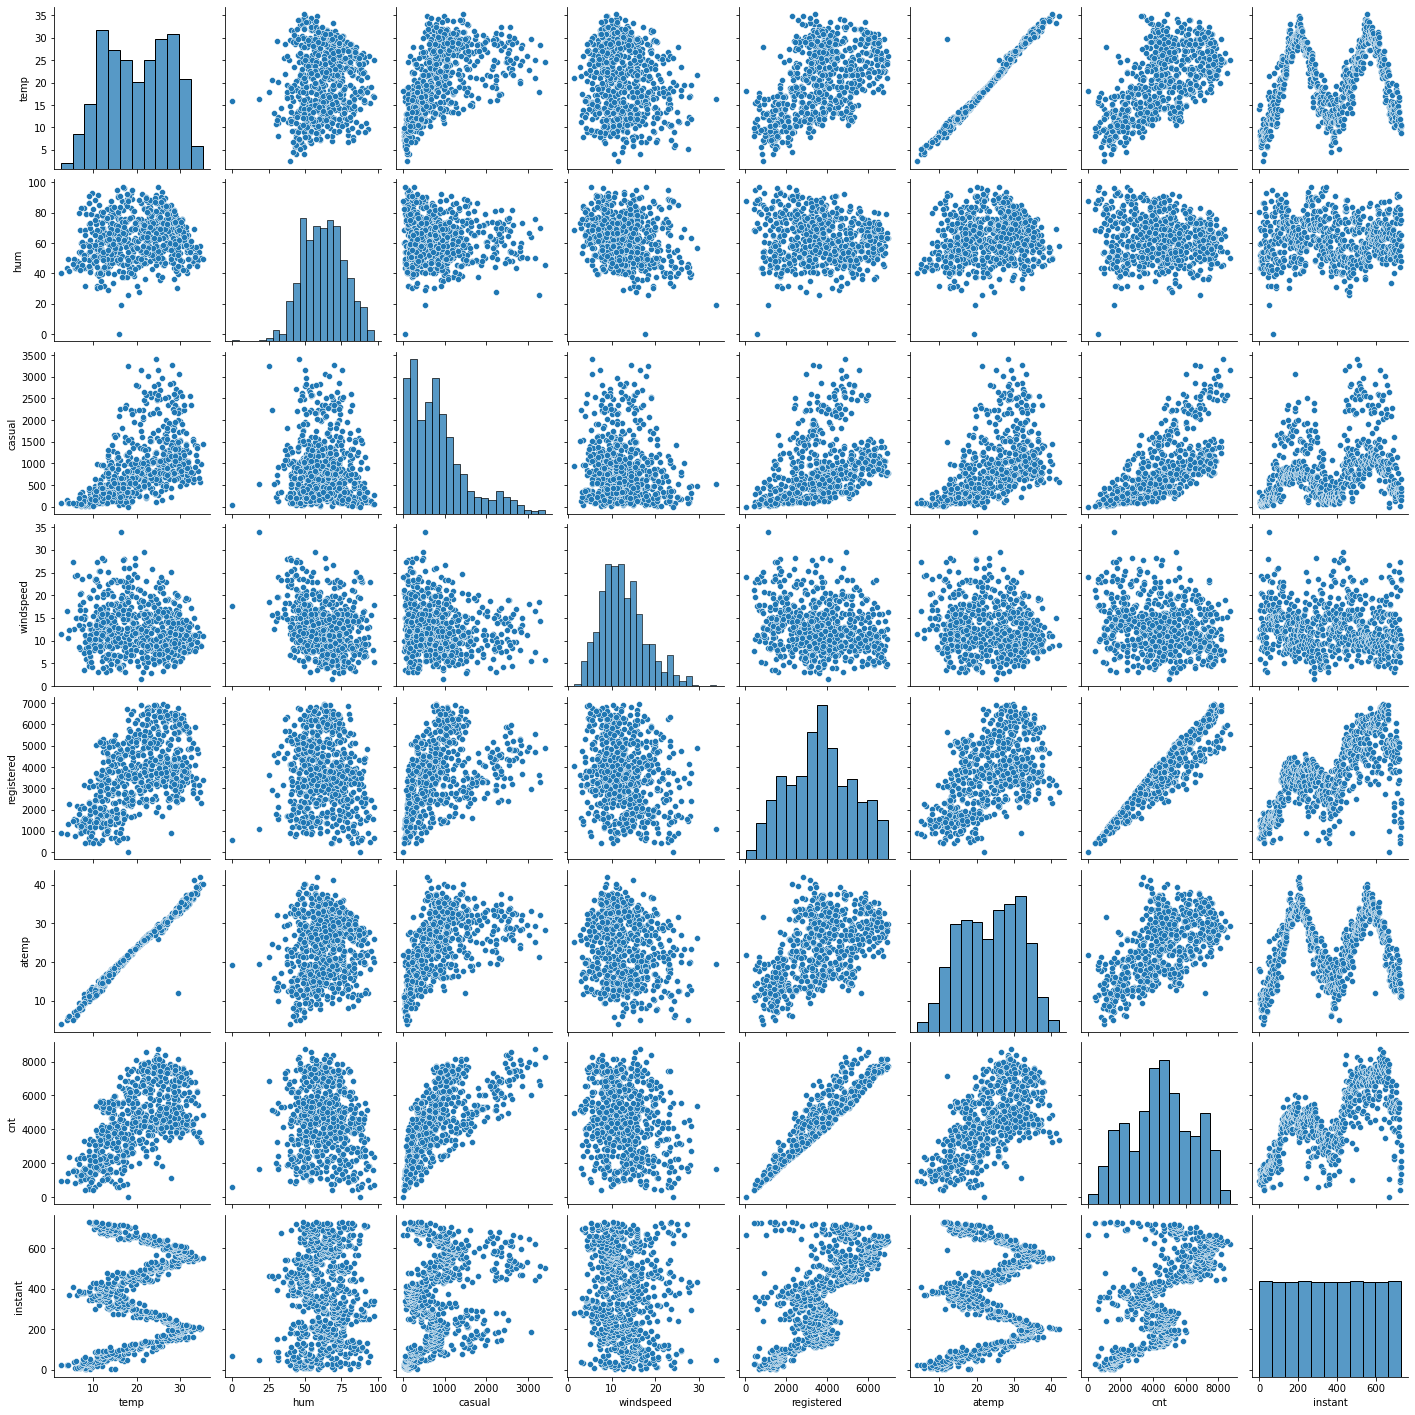

In [8]:
# Using pairplot -
n_vars=["temp", "hum",'casual','windspeed','registered','atemp','cnt','instant']
sns.pairplot(bbikes[n_vars])
plt.show()

Upon examining the plots above, it's evident that some independent variables seem to be positively related to the 'cnt' variable.

## Categorical Variables Visualisation 


As we calculated before, there are some categorical variables. 
We will make Boxplots for these variables- 

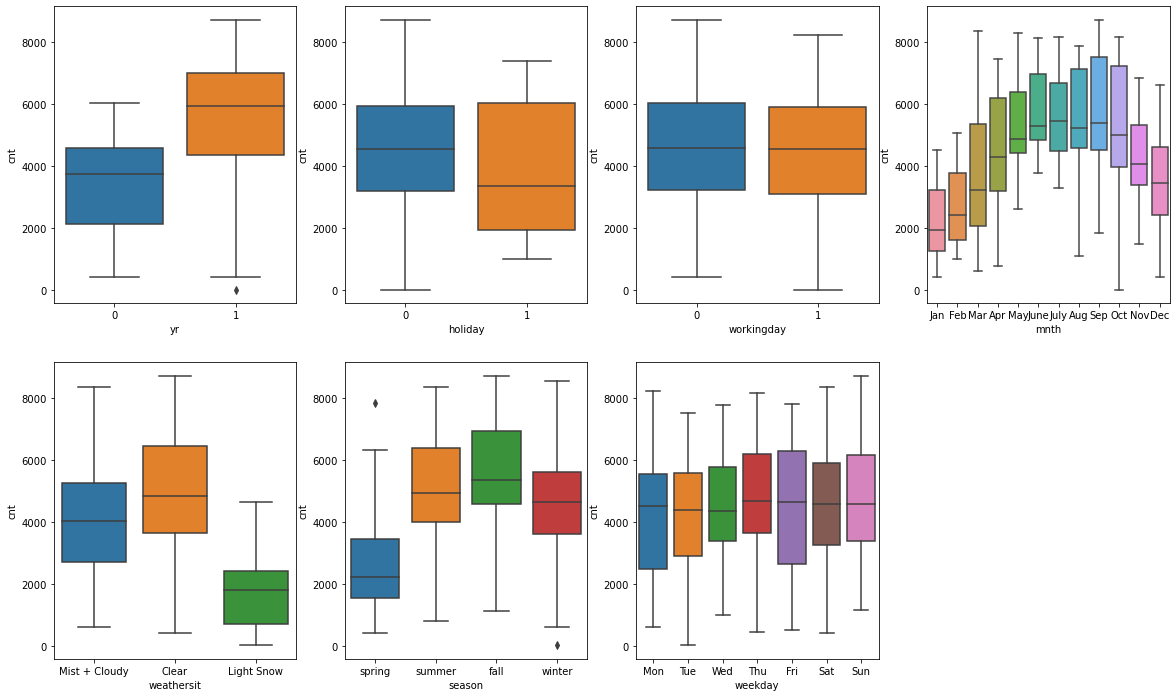

In [9]:
plt.figure(figsize = (20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bbikes)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bbikes)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bbikes)
plt.subplot(2,4,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bbikes)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bbikes)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'cnt', data = bbikes)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = bbikes)

plt.show()

The chart above shows how categorical variables relate to a target variable.

- More bikes are rented in the summer than in the fall.
- 2019 was a good year for bike rentals compared to 2018.
- Rentals tend to go up in clear and partly cloudy weather
- Renting a bike is more popular on Saturday, Wednesday, and Thursday


## Correlation with variables 

- Using Heatmap 

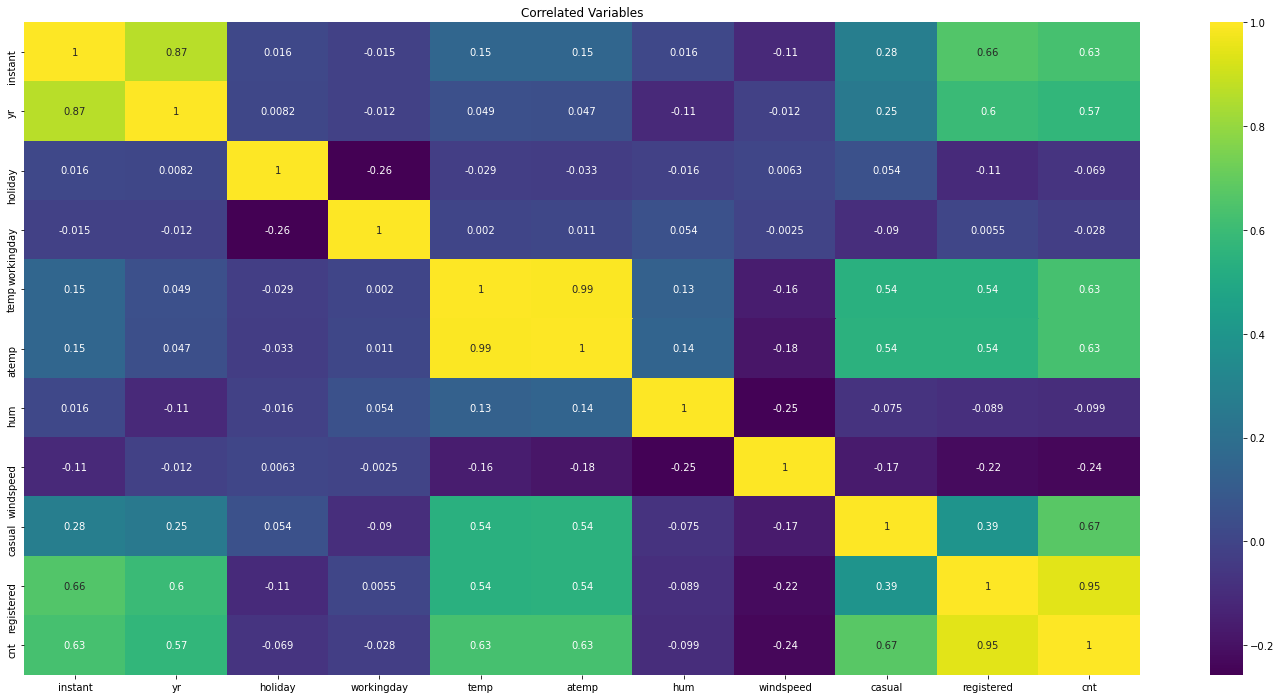

In [10]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(bbikes.corr(), cmap='viridis', annot = True)
plt.title("Correlated Variables")
plt.show()

Temp, Atemp, Casual, Registered, and Instant variables are all related to the "Cnt" variable, as can be seen from the heatmap.

- Some other variables also shows correlation with each other. 
- All the plots above have helped with understanding and interpretting the data well.
- Now, we can decide which variables will be useful for making a linear model. 

#### Lets, drop the unwanted columns from the data 

In [11]:
# While going through the data, we can see that some unwanted columns are present which are not required for the model. 
# We will drop these columns. 

bbikes=bbikes.drop(['instant','dteday','casual','registered','atemp'], axis=1)
bbikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


## Step 3 - Preparing the data for modelling

In [12]:
# Creating the dummy variables for month, season, weathersit, weekday 
# Let's drop the first column from  using 
month=pd.get_dummies(bbikes.mnth,drop_first=True)
weekdays=pd.get_dummies(bbikes.weekday,drop_first=True)
weather_sits=pd.get_dummies(bbikes.weathersit,drop_first=True)
seasons=pd.get_dummies(bbikes.season,drop_first=True)

In [13]:
## Concat the dummy variables with the original data-

bbikes=pd.concat([month,weekdays,weather_sits,seasons,bbikes],axis=1)
bbikes.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [14]:
# We can now Drop 'season','month','weekday','weathersit' as dummy variables for the same has been created 
bbikes.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bbikes.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [15]:
#checking the Number of rows and columns
bbikes.shape


(730, 29)

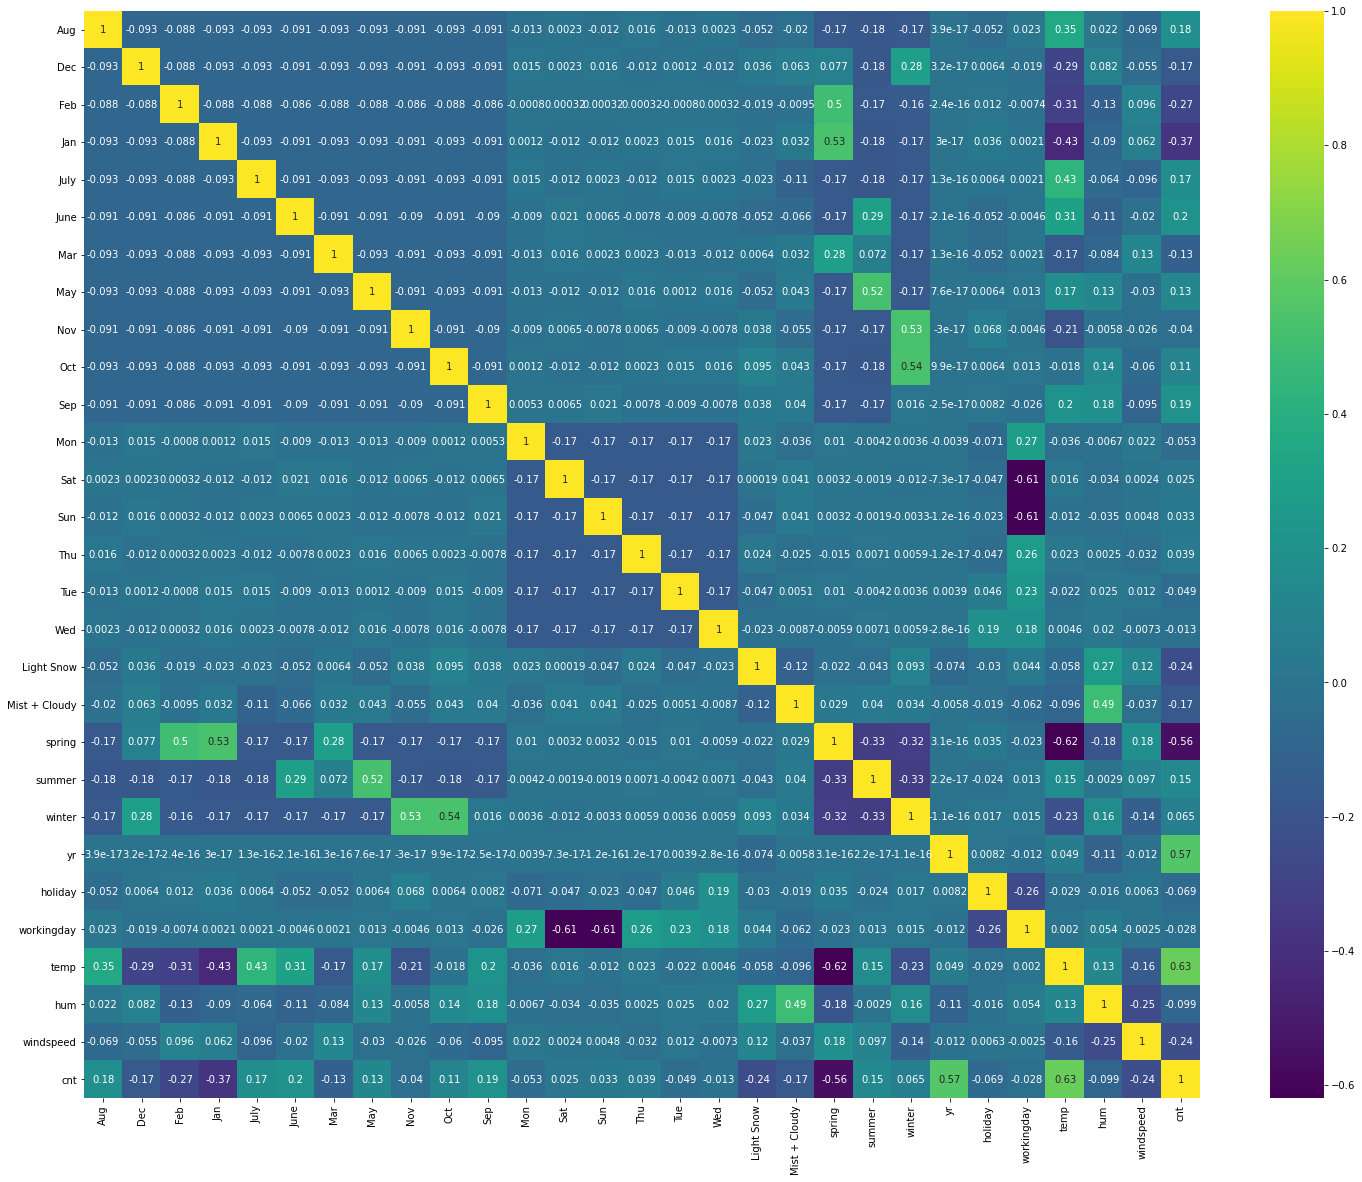

In [16]:
## Now, lets again check the correlation between the variables as many changes has been done to the data. 
# we will use heatmap for the same

plt.figure(figsize=(25, 20))
sns.heatmap(bbikes.corr(), cmap='viridis', annot = True)
plt.show()

The above map tells us that from May to October there is a positive correlation with the 'Cnt' variable. Also, there is a good correlation of temperature and summer season with the 'cnt' variable. 

## Step 4: Split the Data into - Training and Testing Sets

We will perform train-test split before building the model, using this split we will scale the features of the model.

In [17]:
import sklearn 
from sklearn.model_selection import train_test_split

bbikes_train, bbikes_test = train_test_split(bbikes, train_size = 0.7, random_state = 100)

In [18]:
#Checking the rows and columns after splitting 
print(bbikes_train.shape)
print(bbikes_test.shape)

(510, 29)
(220, 29)


### Rescaling the Features
Having variables on the same scale is very important for building a model to be easily explainable. That's why rescaling is required. Standardization or normalization can be use to obtain units of coefficient on the same scale. 

Rescaling have 2 common ways - 

- Normalisation (Min-Max Scaling): (x-xmin)/(xmax-xmin) - Between 0 and 1
- Standardisation: (x-mu/sigma) - mean-0, sigma-1

#### Min-Max Scaling 

In [19]:
#import the library
from sklearn.preprocessing import MinMaxScaler

In [20]:
### 2 steps in min-max scaling - 
# 1. Instantiate an object
scaler = MinMaxScaler()

## Creating a list of numeric variables
nm_vars=['temp','hum','windspeed','cnt']

# 2. Fit on data
bbikes_train[nm_vars] = scaler.fit_transform(bbikes_train[nm_vars])
bbikes_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.345824,0.751824,0.380981,0.191095


In [21]:
# check this numeric variable after scaling 
bbikes_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As the table shows, the numeric variables lies between 0 and 1. 

Multicollinearity : The happening of high intercorrelations among two or more independent variables in a multiple regression model.

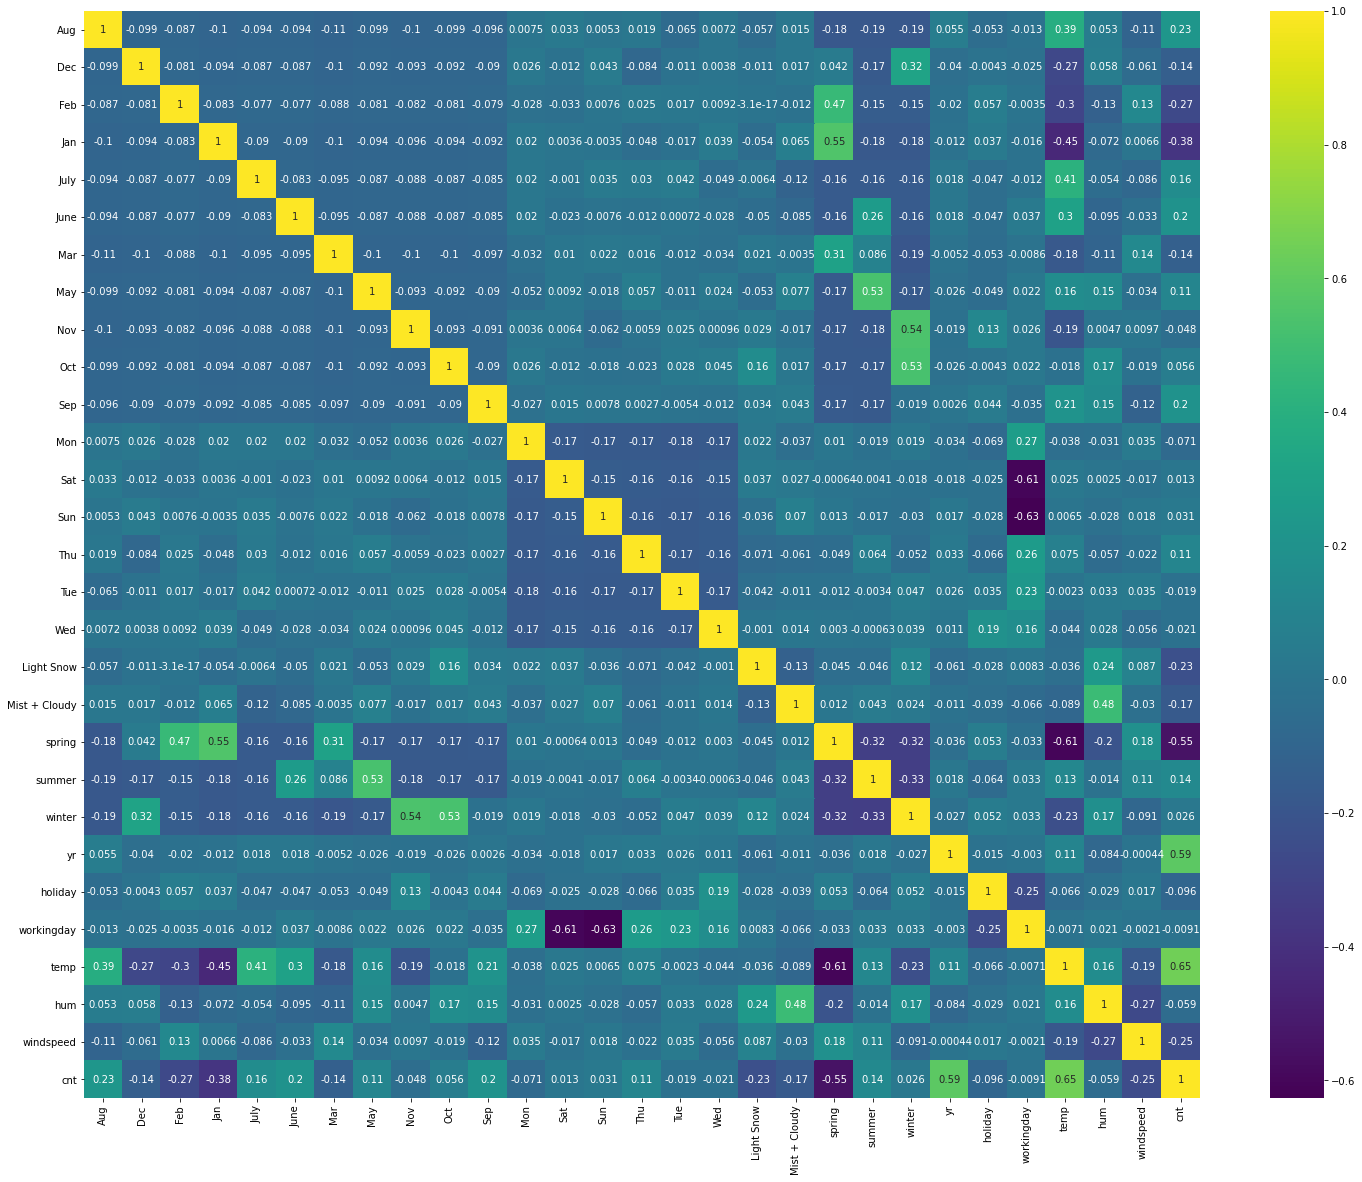

In [22]:
# Now, recheck the correlation coefficients after scaling to see whcih variables are highly correlated

#We have to see little to no multicollinearity among predictors

plt.figure(figsize=(25, 20))
sns.heatmap(bbikes_train.corr(),cmap='viridis',annot = True)
plt.show()

So, the above heatmap shows a correlation between temp and year with the 'cnt' variable.  The months August, September and June show us somewhat high 'Cnt' values. 

## Step 5: Constructing a Linear Model 


In [23]:
# Dividing into X and Y sets for the model building
#Divide the data into X and y
y_train = bbikes_train.pop('cnt')
X_train = bbikes_train

#### Recursive Feature Elimination (RFE) - To select the top 'n' features

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression                             

In [25]:
lms = LinearRegression()
lms.fit(X_train, y_train)

rfe = RFE(lms, 15)             
rfe= rfe.fit(X_train, y_train)

In [73]:
#Selected variables are listed now 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [72]:
#RFE support is true- 
colmn = X_train.columns[rfe.support_]
colmn

Index(['Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter', 'yr', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [28]:
#RFE support is False-
X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'workingday'],
      dtype='object')

In [29]:
# Creating X_test dataframe with RFE selected variables
X_train_rfes = X_train[colmn]

In [30]:
# Add a constant variable 
# import the required library

import statsmodels.api as sm  
X_train_rfes = sm.add_constant(X_train_rfes)

In [31]:
# Now, run the linear model 
lm = sm.OLS(y_train,X_train_rfes).fit()

In [32]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 10 May 2022   Prob (F-statistic):          8.15e-189
Time:                        15:10:39   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859

## Checking VIF

Variance Inflation Factor (VIF) is a measure of how well a predictor variable is correlated with all the other variables, excluding the target variable. To check/test our models, it's a a very important factor.

FORMULA OF VIF - 

𝑉𝐼𝐹𝑖=1/1−𝑅𝑖^2

In [33]:
#Drop the constant 
X_train_rfes = X_train_rfes.drop(['const'], axis=1)

In [34]:
## VIFs for the new model
# importing required library 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfes
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,hum,30.89
12,temp,17.79
14,windspeed,4.72
7,spring,4.37
9,winter,4.06
8,summer,2.82
6,Mist + Cloudy,2.32
10,yr,2.09
3,Nov,1.85
1,Jan,1.75


If we look at the summary and VIF values, so we find that- 
The month January is unimportant in presence of other variables. The reason for it is that it shows high p-value and low VIF.

So, according to the data, January can be dropped.

In [35]:
# Dropping the month January 
X_train_new1 = X_train_rfes.drop(["Jan"], axis = 1)

As we have dropped January, we will again re-build the model without it

In [36]:
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.0
Date:                Tue, 10 May 2022   Prob (F-statistic):          9.86e-189
Time:                        15:10:39   Log-Likelihood:                 511.25
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     495   BIC:                            -929.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3002      0.035      8.499

In [37]:
# Again, Drop the constant 
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [38]:
# Calculating VIFs for the new model-
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,hum,29.30
11,temp,16.75
13,windspeed,4.72
8,winter,4.06
6,spring,4.04
7,summer,2.81
5,Mist + Cloudy,2.31
9,yr,2.08
2,Nov,1.83
1,July,1.59


As, we can see the highest VIF is for Humidity(hum) due to which it is not that important for the data. So, we can drop it. 

In [39]:
# Dropping Humidity(hum)
X_train_new2 = X_train_lm1.drop(["hum"], axis = 1)

In [40]:
# Buildig a new model without the humidity 
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.6
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.29e-185
Time:                        15:10:40   Log-Likelihood:                 501.07
No. Observations:                 510   AIC:                            -974.1
Df Residuals:                     496   BIC:                            -914.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2183      0.031      7.082

In [41]:
## Drop the constant again 
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [42]:
# Calculating VIFs for the new model-
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,5.12
12,windspeed,4.65
8,winter,2.91
7,summer,2.23
6,spring,2.13
9,yr,2.07
2,Nov,1.81
1,July,1.59
5,Mist + Cloudy,1.55
0,Dec,1.42


As, we can see the month Dec shows high p-values and low VIF. So, which mean it will be insignificant for the model and we can drop it.

In [43]:
# Dropping December
X_train_new3=X_train_lm2.drop(['Dec'], axis=1)

In [44]:
# Add Constant 
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.7
Date:                Tue, 10 May 2022   Prob (F-statistic):          4.19e-186
Time:                        15:10:40   Log-Likelihood:                 499.44
No. Observations:                 510   AIC:                            -972.9
Df Residuals:                     497   BIC:                            -917.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2042      0.030      6.839

In [45]:
# Dropping Constant 
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [46]:
#Calculate the VIF for a new Model- 
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.11
11,windspeed,4.65
7,winter,2.28
6,summer,2.23
5,spring,2.09
8,yr,2.07
1,Nov,1.60
0,July,1.58
4,Mist + Cloudy,1.55
2,Sep,1.35


Let's drop November for it high p-value and low VIF. 

In [47]:
#Dropping November
X_train_new4=X_train_lm3.drop(['Nov'], axis=1)

In [48]:
#Build a model, add a constant 
X_train_lm4=sm.add_constant(X_train_new4)
lm4=sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 10 May 2022   Prob (F-statistic):          5.06e-187
Time:                        15:10:40   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1994      0.030      6.746

In [49]:
# Dropping Constant-
X_train_lm4=X_train_lm4.drop(['const'],axis=1)

In [50]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X =X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
9,temp,5.09
10,windspeed,4.60
5,summer,2.23
4,spring,2.08
7,yr,2.07
6,winter,1.78
0,July,1.58
3,Mist + Cloudy,1.55
1,Sep,1.34
2,Light Snow,1.08


July column can be drop

In [51]:
#Drop July
X_train_new5=X_train_lm4.drop(['July'], axis=1)

In [52]:
#Create a new model-
X_train_lm5= sm.add_constant(X_train_new5)
lm5=sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.47e-186
Time:                        15:10:40   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1909      0.030      6.447

In [53]:
#Dropping constant
X_train_lm5=X_train_lm5.drop(['const'],axis=1)

In [54]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,windspeed,4.60
8,temp,3.84
6,yr,2.07
3,spring,1.99
4,summer,1.90
5,winter,1.63
2,Mist + Cloudy,1.55
0,Sep,1.23
1,Light Snow,1.08
7,holiday,1.04


Ok, Now we have our model. The VIFs and p-values are all in the range which is acceptable. 

So, we can make our predictions now - 
- We can see that the p-value for each term is equal to zero, which means it will have no effect. We can easily reject the null hypothesis because of the low p-value (<0.05).

- Secondly, we can see that VIFs in our case are all < 5, which means there in no multicollinearity. We can say that our case is fine and we can further proceed with regression model. 

- The value of R-squared should lies between 0 and 1, where 1 implies that the variance in the data is being explained by the model and 0 implies that none of the variance value is being explained by the model. In our data, we have a R-square value of 0.833 or 83.3%, which is actually good.

- The adjusted R-square on the other hand, penalise models on the basis of the number of variables present in them. The value of adjusted R-square is 0.829 or 82.9%.

- Prob(F-statistics) tells us about the overall significance of the model. Prob(F-statistics) < 0.05 denotes that overall model fit is significant, and Prob(F-statistics) > 0.05 means that we need to review our model as the fit might be by chance. Here, in our case, Prob(F-statistics) is 1.47e-186, which when simplified will come out to be < 0.05, making our model significant. 

In [55]:
## But, lets just check one more model by dropping temp 

In [56]:
#Drop temp
X_train_new5=X_train_lm5.drop(['temp'], axis=1)

In [57]:
X_train_lm5= sm.add_constant(X_train_new5)
lm5=sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     178.8
Date:                Tue, 10 May 2022   Prob (F-statistic):          4.30e-150
Time:                        15:10:40   Log-Likelihood:                 405.99
No. Observations:                 510   AIC:                            -792.0
Df Residuals:                     500   BIC:                            -749.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5790      0.015     39.491

We can see here, that there is a droop in R-square and adjusted R-square. Which signifies that this model is not good. 

So, lm5 is our model, we have obtained this model by dropping January, Humidity, December, November, July.

## Step 6: Residual Analysis

To verify the regression model, residual analysis plays an important part. We have to check whether the error terms are distributed normally. For that, let's plot a histogram, to check whether the model is valid. 

In [58]:
X_train_lm5

,const,Sep,Light Snow,Mist + Cloudy,spring,summer,winter,yr,holiday,windspeed
576,1.0,0,0,0,0,0,0,1,0,0.264686
426,1.0,0,0,1,1,0,0,1,0,0.255342
728,1.0,0,0,0,1,0,0,1,0,0.663106
482,1.0,0,0,1,0,1,0,1,0,0.188475
111,1.0,0,0,1,0,1,0,0,0,0.380981
...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,1,0,0.187140
53,1.0,0,0,0,1,0,0,0,0,0.111379
350,1.0,0,0,1,0,0,1,0,0,0.431816
79,1.0,0,0,1,0,1,0,0,0,0.529881


In [59]:
#y train predicted
y_train_pred = lm5.predict(X_train_lm5)

In [60]:
# we have already imported matplot library and seaborn 
%matplotlib inline

<Figure size 432x288 with 0 Axes>

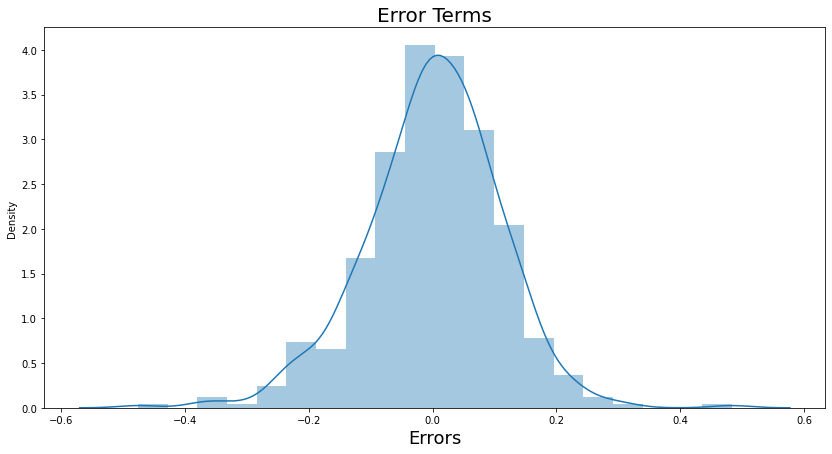

In [61]:
# Now, plotting of histogram to check the error terms 
fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)  
plt.show()

We can see from the above histogram, all the error terms are normally distributed.

## Step 7: Prediction and Evaluation on the test set 

#### Scaling the test set-

In [62]:
# List of numeric variables
no_vars=['temp','hum','windspeed','cnt']

#Fit on data
bbikes_test[no_vars] = scaler.transform(bbikes_test[no_vars])
bbikes_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0.817246,0.314298,0.537414,0.569029


Dividing into X_test and y_test-

In [63]:
y_test = bbikes_test.pop('cnt')
X_test = bbikes_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [64]:
#Columns
X_train_new5.columns

Index(['Sep', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer', 'winter',
       'yr', 'holiday', 'windspeed'],
      dtype='object')

In [65]:
# Now, make prediction using the model 

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Sep,Light Snow,Mist + Cloudy,spring,summer,winter,yr,holiday,windspeed
184,1.0,0,0,1,0,0,0,0,1,0.084219
535,1.0,0,0,0,0,1,0,1,0,0.153728
299,1.0,0,0,1,0,0,1,0,0,0.334206
221,1.0,0,0,0,0,0,0,0,0,0.339570
152,1.0,0,0,0,0,1,0,0,0,0.537414


In [67]:
# Making predictions
y_pred = lm5.predict(X_test_new1)

In [68]:
## Let's Find the R-square for the test
# Import the required library

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7419791363256159

In [69]:
#Adjusted R^2

Adj_r2=1-(1-0.7413934)*(11-1)/(11-1-1)
print(Adj_r2)

0.7126593333333333


<Figure size 432x288 with 0 Axes>

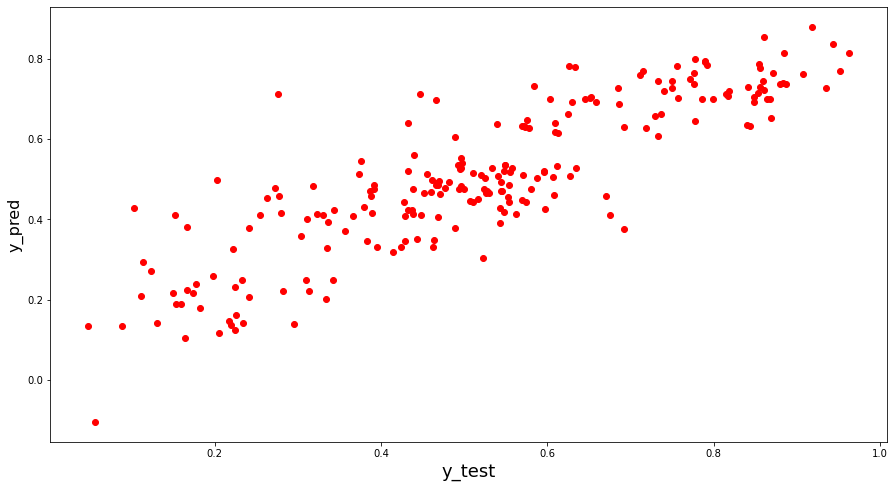

In [70]:
# Lets, plot y_test and y_pred, check the spread
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='red')
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16) 
plt.show()

#### Visualising the fit on the test set

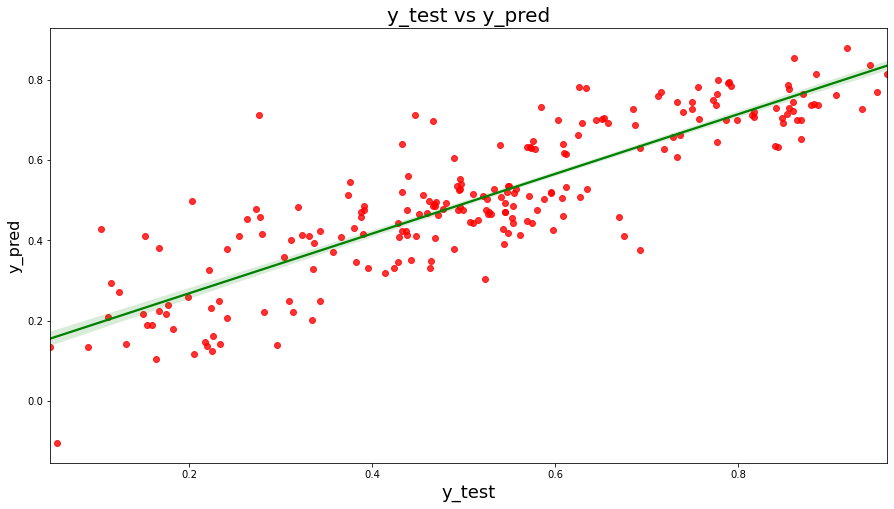

In [71]:
#Make the Regression plot, 
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "red"}, line_kws={"color": "green"})

plt.title('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          
plt.show()

We can see that the equation of our best fitted line is:

###### Count= 0.4720×temp + 0.0889×Sep + 0.0603×summer + 0.0988×winter + 0.2342×Yr - 0.2863×LightSnow - 0.0791×Mist,Cloudy - 0.0590×Spring - 0.0928×holiday - 0.1464×windspeed

### Comparing Train data and Test data set - Final:

- Train R^2 : 0.833
- Train Adjusted R^2 : 0.829
- Test R^2: 0.741
- Test Adjusted R^2: 0.712
- Difference in R^2 between train and test: 9.2%
- Difference in adjusted R^2 between Train and test: 11.7% 

#### Problem Analysis:- 

- Temperature variable have the highest coefficient 0.4720, which means as the temp increase, number of bike rentals also increases. 

- We also see there are some variables with negative coefficients. A negative coefficient suggests that as the independent variable and dependent variable tend to share an inversaly propotional relationship. Which means if the as independent variable increases, dependent variable decreases.

- We have spring, mist cloudy , light snow variables with negative coefficient. 

#### Business Goals:
- We can use temperature as a prime factor while taking decision for the organisation. 
- Demand for bikes was more in 2019 than 2018
- Fall season could be a good weather for renting bikes, this information also can be used by the organisation.
